# Set Image, Text, Resolution

In [ ]:
from PIL import Image
from string import Template
import os
import requests
from google.colab import drive
from enum import Enum
 
class ItemType(Enum):
    IMG = 1
    TXT = 2

txt1 = '''

About:
Lenna (or Lena) is a standard test image used in the field of digital image processing starting in 1973. It is a picture of the Swedish model Lena Forsén, shot by photographer Dwight Hooker, cropped from the centerfold of the November 1972 issue of Playboy magazine. 
'''

txt2 = '''
History: 
The spelling "Lenna" came from the model's desire to encourage the proper pronunciation of her name. "I didn't want to be called Leena" she explained.
'''

#### specify images & texts
items = [
    {'itemtype': ItemType.TXT, 'item': txt1 },
    {'itemtype': ItemType.TXT, 'item': txt2 },
    {'itemtype': ItemType.IMG, 'item': 'http://www.lenna.org/len_std.jpg' },
    {'itemtype': ItemType.IMG, 'item': 'https://www.sjsu.edu/online/pics/Sammy%20at%20Admitted%20Spartan%20Day%20compressed.jpg' },
]

#### set display resolution
width,height = (100, 120) #That's what our VGA supports!!!!

#### Mount Google Drive if it's not already mounted
if not os.path.exists('/content/drive'):
  drive.mount('/content/drive')
else:
  print('Google Drive is already mounted.')
  
#### set output file
filename = 'data.hex'
folder = '/content/drive/MyDrive/Colab Notebooks/Img2Hex/'
my_file = open(folder + filename,'w+')


Google Drive is already mounted.


# Prepare Data

In [ ]:
##### VGA uses RGB332 format for pixels
def rgb888_to_rgb332(rgb):
    r, g, b = rgb
    r = (r >> 5) << 5 # 3-bits
    g = (g >> 5) << 2 # 3-bits
    b = (b >> 6) << 0 # 2-bits
    return (r | g | b)

##### Item 1 -> {'itemtype': <ItemType.TXT: 2>, 'item': '\n\nAbout:\nLenna (or Lena) is a standard test image used in the field of digital image processing starting in 1973. It is a picture of the Swedish model Lena Forsén, shot by photographer Dwight Hooker, cropped from the centerfold of the November 1972 issue of Playboy magazine. \n'}
['C0000116', '0000000A', '0000000A', '00000041', '00000062', '0000006F', '00000075', '00000074', '0000003A', '0000000A', '0000004C', '00000065', '0000006E', '0000006E', '00000061', '00000020', '00000028', '0000006F', '00000072', '00000020', '0000004C', '00000065', '0000006E', '00000061', '00000029', '00000020', '00000069', '00000073', '00000020', '00000061', '00000020', '00000073', '00000074', '00000061', '0000006E', '00000064', '00000061', '00000072', '00000064', '00000020', '00000074', '00000065', '00000073', '00000074', '00000020', '00000069', '0000006D', '00000061', '00000067', '00000065', '00000020', '00000075', '00000073', '00000065', '00000064'

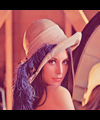

(100, 120)

['40002711', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00000000', '00

NameError: ignored

In [ ]:
snip = []
base_addr = 0
curr_addr = base_addr

for idx,item in enumerate(items):

  print("##### Item {} -> {}".format((idx + 1), item))
  
  if(item.get('itemtype') == ItemType.TXT):
    text_snip = []
    text_header = 0
    text_or_img = 1
    hasMore = 0 if (idx == len(items) - 1) else 1
    lenFld = len(item.get('item')) + 1 # +2 for newline (line feed + carriage return) \n\r
    text_header |= (text_or_img << 31)
    text_header |= (hasMore << 30) 
    text_header |= lenFld
    text_snip.append('{:08X}'.format(text_header))
    curr_addr += 1;
    for char in item.get('item'):
      text_snip.append('{:08X}'.format(ord(char)))
      curr_addr += 1;
    text_snip.append('{:08X}'.format(ord('\r')))
    curr_addr += 1;
    #text_snip.append('{:08X}'.format(ord('\n'))) 
    #curr_addr += 1;
    print(text_snip)
    snip = snip + text_snip

  elif(item.get('itemtype') == ItemType.IMG):

    ##### Resize Image to supported width and height

    # open image
    #img = Image.open(requests.get(item.get('item'), stream=True).raw) # if you get an error here, probably the image url is incorrect
    try:
      # Send a GET request to download the image data
      response = requests.get(item.get('item'), stream=True)
      response.raise_for_status()  # Raise an exception if a HTTP error occurred

      # Open the image using PIL
      img = Image.open(response.raw)

    except requests.exceptions.RequestException as e:
        sys.exit(f"Error occurred while downloading the image: {str(e)}")

    except IOError as e:
        sys.exit(f"Error occurred while opening the image: {str(e)}")




    # Get the current dimensions of the image
    orig_width, orig_height = img.size

    # Determine the scaling factor to resize the image without changing its aspect ratio
    scale = min(width/orig_width, height/orig_height)

    # Calculate the new dimensions of the image
    new_width = int(orig_width * scale)
    new_height = int(orig_height * scale)

    # Create a new image with the desired dimensions and fill it with black
    new_image = Image.new("RGB", (width, height), (0, 0, 0))

    # Calculate the position to paste the resized image
    x_offset = (width - new_width) // 2
    y_offset = (height - new_height) // 2

    # Resize the original image and paste it onto the new image
    resized_image = img.resize((new_width, new_height))
    new_image.paste(resized_image, (x_offset, y_offset))
    img = new_image
    display(img)
    display(img.size)

    isImgLoaded = False
    try:
        img.verify()
        isImgLoaded = True
    except Exception:
        print('Invalid image')
        isImgLoaded = False
        
    if isImgLoaded:
      img_snip = []
      img_header = 0
      text_or_img = 0
      lenFld = (new_height * new_width)
      hasMore = 0 if (idx == len(items) - 1) else 1
      img_header |= (text_or_img << 31)
      img_header |= (hasMore << 30) | hasMore
      img_header |= lenFld
      img_snip.append('{:08X}'.format(img_header))
      curr_addr += 1
      for row in range(0,new_height):
        #for row in range(0,1):
        for col in range(0,new_width):
          pixel = img.getpixel((col,row)) 
          pixel = rgb888_to_rgb332(pixel)
          img_snip.append('{:08X}'.format(pixel))
          curr_addr += 1
    print(img_snip)
    snip = snip + img_snip

print("\nFinal")
print(snip)

# Put the Final Snip in Output File



In [ ]:
### write to output file
for s in snip:
  my_file.write(s + "\n")
my_file.close()

print ("done !!!\n\n")
print ("Output is available below file:\n")
print (os.path.abspath(my_file.name))